In [ ]:
# Support libraries from EDx CS188
import util
import search

In [8]:
# Libraries and code for graph and tree visualization
from graphviz import Graph, Digraph
from IPython.display import display

class search_tree():
    def __init__(self):
        self.graph = Digraph(graph_attr = {'size':'9'})
        
    def addNode(self, name, label):
        self.graph.node(name, label)

    def addEdge(self, source, action, target):
        self.graph.edge(source, target, action)
    
    def getDot(self):
        return self.graph
    
def graphDot(g_prob, color):
    dot = Graph(graph_attr = {'size':'3.5'})
    for node in g_prob.G:
        if not node in color:
            dot.node(node)
        else:
            dot.node(node, style = 'filled', color = color[node])
    for n1 in g_prob.G:
        for n2 in g_prob.G[n1]:
            if n1 < n2:
                dot.edge(n1, n2)
    return dot


# Uninformed Search

## A search problem

In [9]:
class graph_problem(search.SearchProblem):
    def __init__(self, vertices, edges):
        self.G = {v:{} for v in vertices}
        for v1, v2, c in edges1:
            (self.G[v1])[v2] = c
            (self.G[v2])[v1] = c
        self.start = vertices[0]
        self.goal = vertices[-1]
        
    def getStartState(self):
        return self.start

    def isGoalState(self, state):
        return self.goal == state

    def getSuccessors(self, state):
        successors = [(suc, state + '->' + suc, 
                       (self.G[state])[suc]) for suc in self.G[state]]
        return successors
    


{'s': {'r': 1, 'w': 1}, 'r': {'s': 1, 'v': 1}, 'u': {'y': 1, 't': 1}, 't': {'x': 1, 'u': 1, 'w': 1}, 'w': {'x': 1, 's': 1, 't': 1}, 'v': {'r': 1}, 'y': {'x': 1, 'u': 1}, 'x': {'y': 1, 't': 1, 'w': 1}}
{'x': 1, 's': 1, 't': 1}
s
True


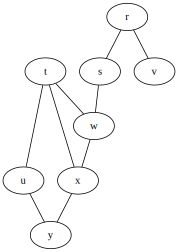

In [10]:
edges1 = [('v', 'r', 1), ('r', 's', 1), ('w', 't', 1),('s','w', 1),
         ('w', 'x', 1), ('t', 'x', 1), ('t', 'u', 1), ('x', 'y', 1),
         ('u', 'y', 1)]
vertices1 = ['s', 'r', 't', 'u', 'v', 'w', 'x', 'y'] 
problem1 = graph_problem(vertices1, edges1)
print problem1.G
print problem1.G['w']
print problem1.getStartState()
print problem1.isGoalState('y')
dot = graphDot(problem1, {})
display(dot)

## General graph search

In [11]:
def general_ui_search(problem, frontier):
    visited = {}
    tree = search_tree()
    state = problem.getStartState()
#    display(graphDot(problem, visited))
    frontier.push((state, []))
    visited[state] = 'gray'
    while not frontier.isEmpty():
        u, actions = frontier.pop()
#        print 'Pop:', u 
        if problem.isGoalState(u):
            return  actions, tree
        for v, action, cost in problem.getSuccessors(u):
            if not v in visited:
                tree.addEdge(str(u), action, str(v))
                visited[v] = 'gray'
                frontier.push((v, actions + [action]))
#            display(graphDot(problem, visited))
#            display(tree.getDot())
        visited[u] = 'black'
    return [], tree

## Depth-first search

In [12]:
def dfs(problem):
   return general_ui_search(problem, util.Stack())

['s->w', 'w->t', 't->u', 'u->y']


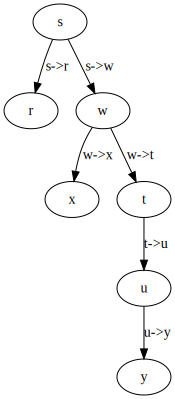

In [13]:
actions, tree = dfs(problem1)
print actions
display(tree.getDot())

## Breadth-first search

In [14]:
def bfs(problem):
   return general_ui_search(problem, util.Queue()) 

['s->w', 'w->t', 't->u', 'u->y']


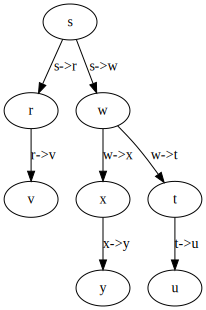

In [15]:
actions1, tree1 = bfs(problem1)
print actions
display(tree1.getDot())

# Informed Search


In [16]:
def general_search(problem, frontier):
    visited = {}
    state = problem.getStartState()
    frontier.push((state, [], 0))
    tree = search_tree()
    tree.addNode(str(state)+"[]",str(state))
    while not frontier.isEmpty():
        u, actions, path_cost = frontier.pop()
        if problem.isGoalState(u):
            return  actions, tree
        if not u in visited:
            for v, action, cost in problem.getSuccessors(u):
                tree.addNode(str(v) + str(actions+[action]), str(v))
                tree.addEdge(str(u) + str(actions), str(cost), str(v) + str(actions+[action]))
                frontier.push((v, actions + [action], path_cost + cost))
        visited[u] = 'black'
    return [], tree

## The pancakes problem

In [17]:
def flip(alist, i):
    return alist[i::-1] + alist[i+1:]

class pancakes_problem(search.SearchProblem):
    def __init__(self, start):
        self.expanded = 0
        self.start = tuple(start)
        
    def getStartState(self):
        return self.start

    def isGoalState(self, state):
        return state == tuple(range(1,len(self.start)+1))

    def getSuccessors(self, state):
        self.expanded += 1
        successors = [(tuple(flip(state, i)), str(i), i + 1)
                       for i in range(1,len(state))]
        return successors

In [18]:
flip([1,2,3,4],3)

[4, 3, 2, 1]

['2', '1']


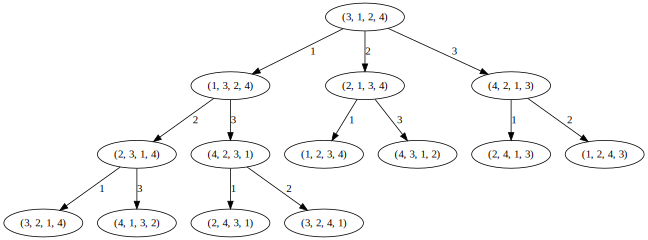

In [19]:
actions1, tree1 = bfs(pancakes_problem([3,1,2,4]))
print actions1
display(tree1.getDot())

## Uniform cost search

In [20]:
def uniformCostSearch(problem):
    def g_cost(item):
        return item[2]
    return general_search(problem, util.PriorityQueueWithFunction(g_cost)) 

In [21]:
problem = pancakes_problem([4,3,1,2,6,5])
actions1, tree1 = uniformCostSearch(problem)
print actions1
print "Expanded nodes:", problem.expanded
display(tree1.getDot())

['4', '5', '4', '1']
Expanded nodes: 372


## A* search

In [16]:
def nullHeuristic(state):
    return 0

def aStarSearch(problem, heuristic=nullHeuristic):
    def f_cost(item):
        return item[2] + heuristic(item[0]) 
    return general_search(problem, util.PriorityQueueWithFunction(f_cost))     

['3', '1']
Expanded nodes: 3


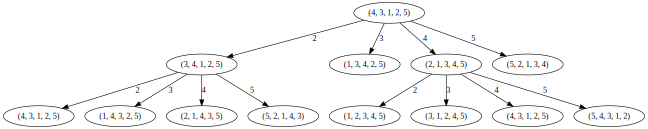

In [17]:
def largestHeuristic(state):
    return max([i+1 for i in range(len(state)) if state[i] <> i + 1] + [0])

problem = pancakes_problem([4,3,1,2,5])
actions1, tree1 = aStarSearch(problem, largestHeuristic)
print actions1
print "Expanded nodes:", problem.expanded
display(tree1.getDot())